In this Linear Machine Learning model, We'll work on cars dataset which consists of all hardware specifications of differents cars.

we are going to predict Miles per Gallon(MPG) of the cars with some indipendent variables from the dataset.

# Importing Libraries

In [4]:
#  Importing libraries for exploratory Data Analysis

import pandas as pd
import numpy as np

#  Importing libraries for Data Visualization

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [5]:
#  importing Data 
cars = pd.read_csv("cars.csv")


In [6]:
#checking data set shape
print(cars.shape)

(32, 12)


In [7]:
cars.head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,Mazda RX4,21.0,6,160.0,110.0,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110.0,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93.0,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110.0,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175.0,3.15,3.440,17.02,0,0,3,2


# Exploratory Data Analysis

In [8]:
#checking for null values in data set
cars.isnull().sum()

Model       0
MPG         0
Cylinder    0
Disp        3
HP          3
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

In [9]:
#  replacing the  null values with mean value
cars = cars.fillna(cars.mean())

In [10]:
cars.isnull().sum()

Model       0
MPG         0
Cylinder    0
Disp        0
HP          0
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

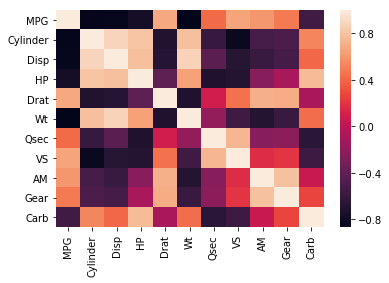

In [11]:
sb.heatmap(cars.corr())

In [12]:
cars.corr()

,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
MPG,1.000000,-0.852162,-0.844253,-0.764345,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
Cylinder,-0.852162,1.000000,0.883549,0.806028,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
Disp,-0.844253,0.883549,1.000000,0.781902,-0.682647,0.882466,-0.428585,-0.677328,-0.589928,-0.530916,0.407567
HP,-0.764345,0.806028,0.781902,1.000000,-0.414259,0.649502,-0.711671,-0.689782,-0.227285,-0.091671,0.761158
Drat,0.681172,-0.699938,-0.682647,-0.414259,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
Wt,-0.867659,0.782496,0.882466,0.649502,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
Qsec,0.418684,-0.591242,-0.428585,-0.711671,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
VS,0.664039,-0.810812,-0.677328,-0.689782,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
AM,0.599832,-0.522607,-0.589928,-0.227285,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
Gear,0.480285,-0.492687,-0.530916,-0.091671,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


Range of Skewness, S < |1.96|
Skewness of hp:  0.8444142994364577
Skewness of wt:  0.44378553550607736
Kurtosis of hp:  0.2424939159880557
Kurtosis of wt:  0.1724705401587343


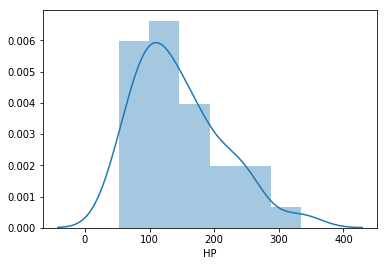

In [15]:
from scipy import stats

sb.distplot(cars.HP)
print("Range of Skewness, S < |1.96|")

print("Skewness of hp: ",stats.skew(cars.HP))
print("Skewness of wt: ",stats.skew(cars.Wt))


print("Kurtosis of hp: ",stats.kurtosis(cars.HP))
print("Kurtosis of wt: ",stats.kurtosis(cars.Wt))

#both HP and Wt passing normality test, they are normal values coming between the range of -1.96 to + 1.96

In [16]:
X = cars.loc[:,['HP','Wt','AM']]
y = cars.MPG

In [17]:
# training and testing model selection
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15,random_state=14)

In [19]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (27, 3)
X_test shape (5, 3)
y_train shape (27,)
y_test shape (5,)


In [20]:
# Importing machine learning algorithm
from sklearn.linear_model import LinearRegression

In [21]:
model_lr = LinearRegression()

In [22]:
model_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_predict = model_lr.predict(X_test)

In [26]:
# Model evaluation 
from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics

In [27]:
r2_score(y_test,y_predict)

0.5747089605237122

In [28]:
y_test

2     22.8
29    19.7
27    30.4
19    33.9
3     21.4
Name: MPG, dtype: float64

In [29]:
y_predict

array([25.42327516, 21.28511438, 26.59396075, 27.62421655, 20.18804005])

In [30]:
predictions = model_lr.predict(X_test)

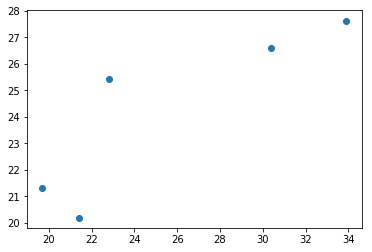

In [31]:
plt.scatter(y_test,predictions)

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.1004344358570224
MSE: 12.946879940152943
RMSE: 3.5981773080481934


# Data Cleaning

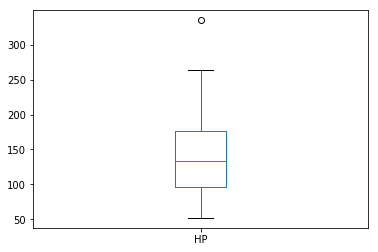

In [33]:
#Outlier analsis
cars.HP.plot(kind="box")

In [34]:
cars[cars.HP==cars.HP.max()]

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
30,Maserati Bora,15.0,8,301.0,335.0,3.54,3.57,14.6,0,1,5,8


In [35]:
cars_final = cars.drop(index=30)

In [36]:
cars_final

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,Mazda RX4,21.0,6,160.000000,110.000000,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.000000,110.000000,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.000000,93.000000,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.000000,110.000000,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.000000,175.000000,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.000000,105.000000,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.000000,245.000000,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.700000,62.000000,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.800000,95.000000,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,229.789655,145.206897,3.92,3.440,18.30,1,0,4,4


In [37]:
X = cars_final.loc[:,['HP','Wt','AM']]
y = cars_final.MPG
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=14)

In [38]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
y_predict = model_lr.predict(X_test)
r2_score(y_test,y_predict)

0.9422574039646744

In [39]:
y_test

2     22.8
18    30.4
15    10.4
3     21.4
26    26.0
Name: MPG, dtype: float64

In [40]:
y_predict

array([26.166262  , 29.86396788, 10.08696523, 20.66543271, 26.74673071])

In [41]:
# print the intercept
print(model_lr.intercept_)

34.22279657053797


In [42]:
predictions = model_lr.predict(X_test)

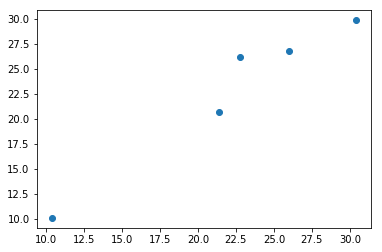

In [43]:
plt.scatter(y_test,predictions)

In [44]:
# Model evaluation 
from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.1393253788462072
MSE: 2.562847382431892
RMSE: 1.6008895597235595


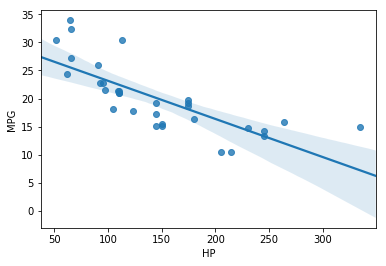

In [46]:
sb.regplot(x = "HP", y = "MPG", data = cars)